## Loading the images
First we want to load the images into a numpy array. Before we do that, let's set up some imports and paths.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "toyProblem_F22"

## Load into a NumPy array
We then want to store the data in a NumPy array.
Along the way we are tasked to convert to grayscale and normalise to the range [0, 1].

In [2]:
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".png")])

num_frames = len(image_files)
image_shape = (256, 256)
image_sequence = np.zeros((num_frames, *image_shape), dtype=np.float32)

for i, file in enumerate(image_files):
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path).convert("L") # this converts to grayscale
    img_array = np.array(img, dtype=np.float32) / 255.0 # this normalises to [0, 1]
    image_sequence[i] = img_array

## Showing the images
We then want to show the images. We do this by showing each image and adding a delay of 0.1 seconds, clearing the frame and restarting.

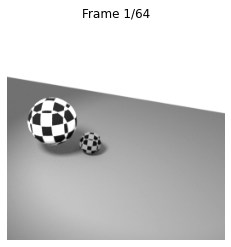

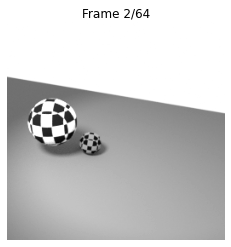

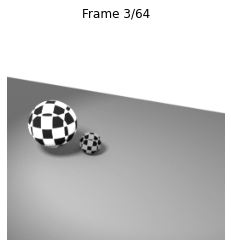

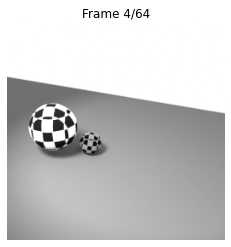

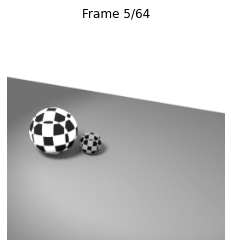

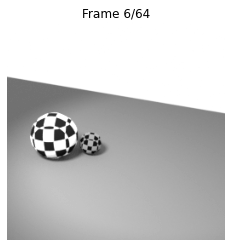

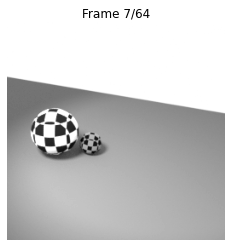

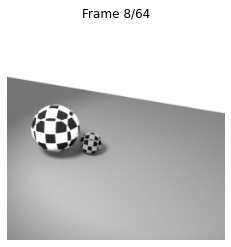

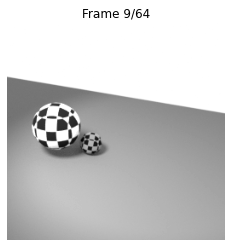

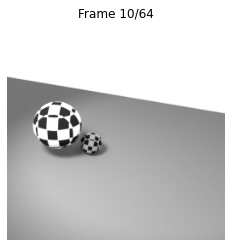

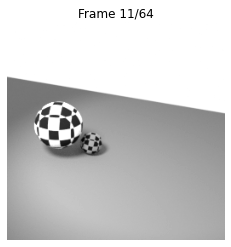

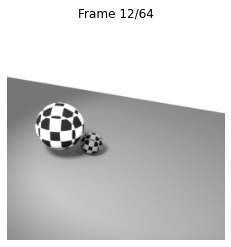

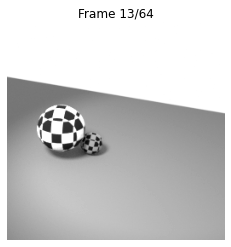

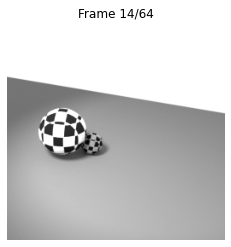

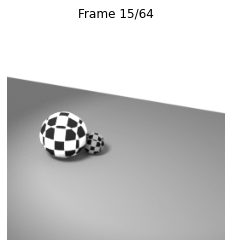

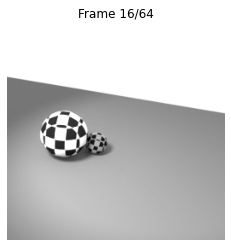

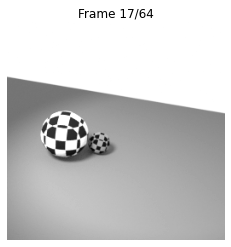

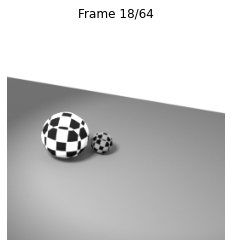

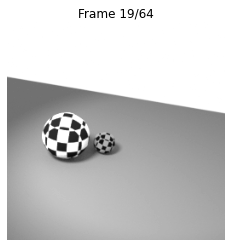

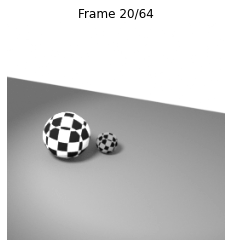

In [ ]:
plt.figure()
for frame in range(num_frames):
    plt.imshow(image_sequence[frame], cmap="gray")
    plt.title(f"Frame {frame+1}/{num_frames}")
    plt.axis("off")
    plt.pause(0.1)
    plt.clf()

plt.close()